In [7]:
import numpy as numpy
import pandas as pd
import seaborn as sns

In [3]:
DEATH_BY_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
CASES_COV = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [5]:
def data_preparation(url):
    """
    Function to prepare the data to be analyzed.
    """
    data_df = pd.read_csv(url)
    colums_exclud = data_df.columns[[0, 2, 3]]
    data_df.drop(colums_exclud,
                 axis=1,
                 inplace=True)
    data_df = data_df.set_index("Country/Region")
    data_df = data_df.groupby(level=0).sum()
    return data_df


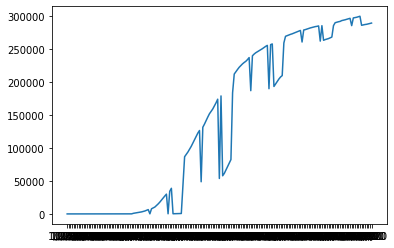

In [15]:
data = data_preparation(DEATH_BY_COV)
data = data.loc["United Kingdom"]

sns.lineplot(data=data)

In [22]:
pd.set_option('display.max_rows', None)
print(data)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         0
1/28/20         0
1/29/20         0
1/30/20         0
1/31/20         2
2/1/20          2
2/2/20          2
2/3/20          8
2/4/20          8
2/5/20          9
2/6/20          9
2/7/20          9
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        15
2/12/20        16
2/13/20        17
2/14/20        18
2/15/20        18
2/16/20        18
2/17/20        19
2/18/20        19
2/19/20        20
2/20/20        22
2/21/20        23
2/22/20        23
2/23/20        28
2/24/20        30
2/25/20        34
2/26/20        37
2/27/20        44
2/28/20        56
2/29/20        61
3/1/20         94
3/2/20        134
3/3/20        189
3/4/20        246
3/5/20        295
3/6/20        374
3/7/20        429
3/8/20        483
3/9/20        630
3/10/20       889
3/11/20      1301
3/12/20      1790
3/13/20      2270
3/14/20      2634
3/15/20      3077
3/16/20      3692
3/17/20   